# Import Libraries

If you don't have this libraries installed, you might be install with pip install "library"

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

from datetime import date
import calendar

import warnings
warnings.filterwarnings("ignore")

import matplotlib as plt
import matplotlib.pyplot as plt

# Import Data

In this section, I create a function to collect the data necessary for the analysis using the module yfinance.

In [2]:
def importData(asset):
    data = yf.download(asset).dropna()
    data = data.drop(['Volume'],axis=1)
    return data

asset = "BTC-USD"
df    = importData(asset)
df.head()

[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD
Date                                                      
2014-09-17  457.334015  468.174011  452.421997  465.864014
2014-09-18  424.440002  456.859985  413.104004  456.859985
2014-09-19  394.795990  427.834991  384.532013  424.102997
2014-09-20  408.903992  423.295990  389.882996  394.673004
2014-09-21  398.821014  412.425995  393.181000  408.084991

# Calculate de Returns 

With the data collected, the function requires 2 parameters. The first is a dataframe and the second is the period of time you want to calculate the percentege change. This period are:

* M : monthly
* 6M: semi-annual
* 4M: quartiles
* 3M: quarterly


In [9]:
def month(x):
    return calendar.month_name[int(x)] if not np.isnan(x) else np.nan

def rets(dfr, freq):
    df_period = pd.DataFrame()
    df_resampled = dfr.resample(freq).last()
    df_period['PctChange'] = df_resampled['Close'].pct_change() * 100
    fecha = pd.to_datetime(df_period.index)
    df_period['Year'] = fecha.year
    
    if freq == 'M':
        df_period['Period'] = fecha.month
        df_period['Name_Period'] = df_period.Period.apply(month)
        periods = ['January','February','March','April','May','June',
                   'July','August','September','October','November','December']
    elif freq == '6M':
        df_period['Period'] = (fecha.month - 1) // 6 + 1
        df_period['Name_Period'] = 'Semestre ' + df_period.Period.astype(str)
        periods = ['Semestre 1', 'Semestre 2']
    elif freq == '4M':
        df_period['Period'] = (fecha.month - 1) // 4 + 1
        df_period['Name_Period'] = 'Cuartil ' + df_period.Period.astype(str)
        periods = ['Cuartil 1', 'Cuartil 2', 'Cuartil 3']
    elif freq == '3M':
        df_period['Period'] = fecha.quarter
        df_period['Name_Period'] = 'Q' + df_period.Period.astype(str)
        periods = ['Q1', 'Q2', 'Q3', 'Q4']    
        
    df_period = df_period.pivot_table(
         index   = 'Year',
         columns = 'Name_Period',
         values  = 'PctChange')
    
    df_period = df_period[periods]
    pd.options.display.float_format = '{:,.2f}%'.format
    
    return df_period

In [14]:
freq = 'M'
df_Rend = rets(df, freq)
df_Rend

Name_Period  January  February   March   April     May    June   July  August  \
Year                                                                            
2014             NaN       NaN     NaN     NaN     NaN     NaN    NaN     NaN   
2015         -32.08%    16.92%  -3.95%  -3.31%  -2.52%  14.28%  8.20% -19.18%   
2016         -14.35%    18.69%  -4.79%   7.58%  18.53%  26.71% -7.23%  -7.88%   
2017           0.69%    21.60%  -9.17%  25.76%  69.63%   8.50% 15.90%  63.58%   
2018         -27.80%     1.73% -32.93%  32.51% -18.90% -14.55% 21.49%  -9.55%   
2019          -7.61%    11.48%   6.50%  30.33%  60.25%  26.15% -6.76%  -4.51%   
2020          29.98%    -8.03% -25.13%  34.48%   9.27%  -3.41% 23.92%   3.16%   
2021          14.18%    36.31%  30.53%  -1.98% -35.35%  -6.14% 18.79%  13.31%   
2022         -16.89%    12.24%   5.43% -17.18% -15.70% -37.77% 17.95% -14.09%   
2023          39.84%     0.03%  23.03%   2.78%  -7.00%  11.97% -4.09% -11.29%   
2024           0.75%    43.72%  16.56% -15.00%  11.30%  -7.13%  3.10%  -8.74%   
2025           9.61%    -6.44%     NaN     NaN     NaN     NaN    NaN     NaN   

Name_Period  September  October  November  December  
Year                                                 
2014               NaN  -12.57%    11.74%   -15.30%  
2015             2.61%   33.09%    20.10%    14.11%  
2016             5.95%   14.96%     6.38%    29.24%  
2017            -7.75%   49.09%    58.21%    38.33%  
2018            -5.85%   -4.65%   -36.41%    -6.83%  
2019           -13.88%   10.92%   -17.72%    -4.97%  
2020            -7.67%   27.79%    42.41%    47.77%  
2021            -7.16%   40.03%    -7.03%   -18.77%  
2022            -3.08%    5.48%   -16.23%    -3.62%  
2023             4.00%   28.55%     8.78%    12.07%  
2024             7.39%   10.87%    37.36%    -3.13%  
2025               NaN      NaN       NaN       NaN

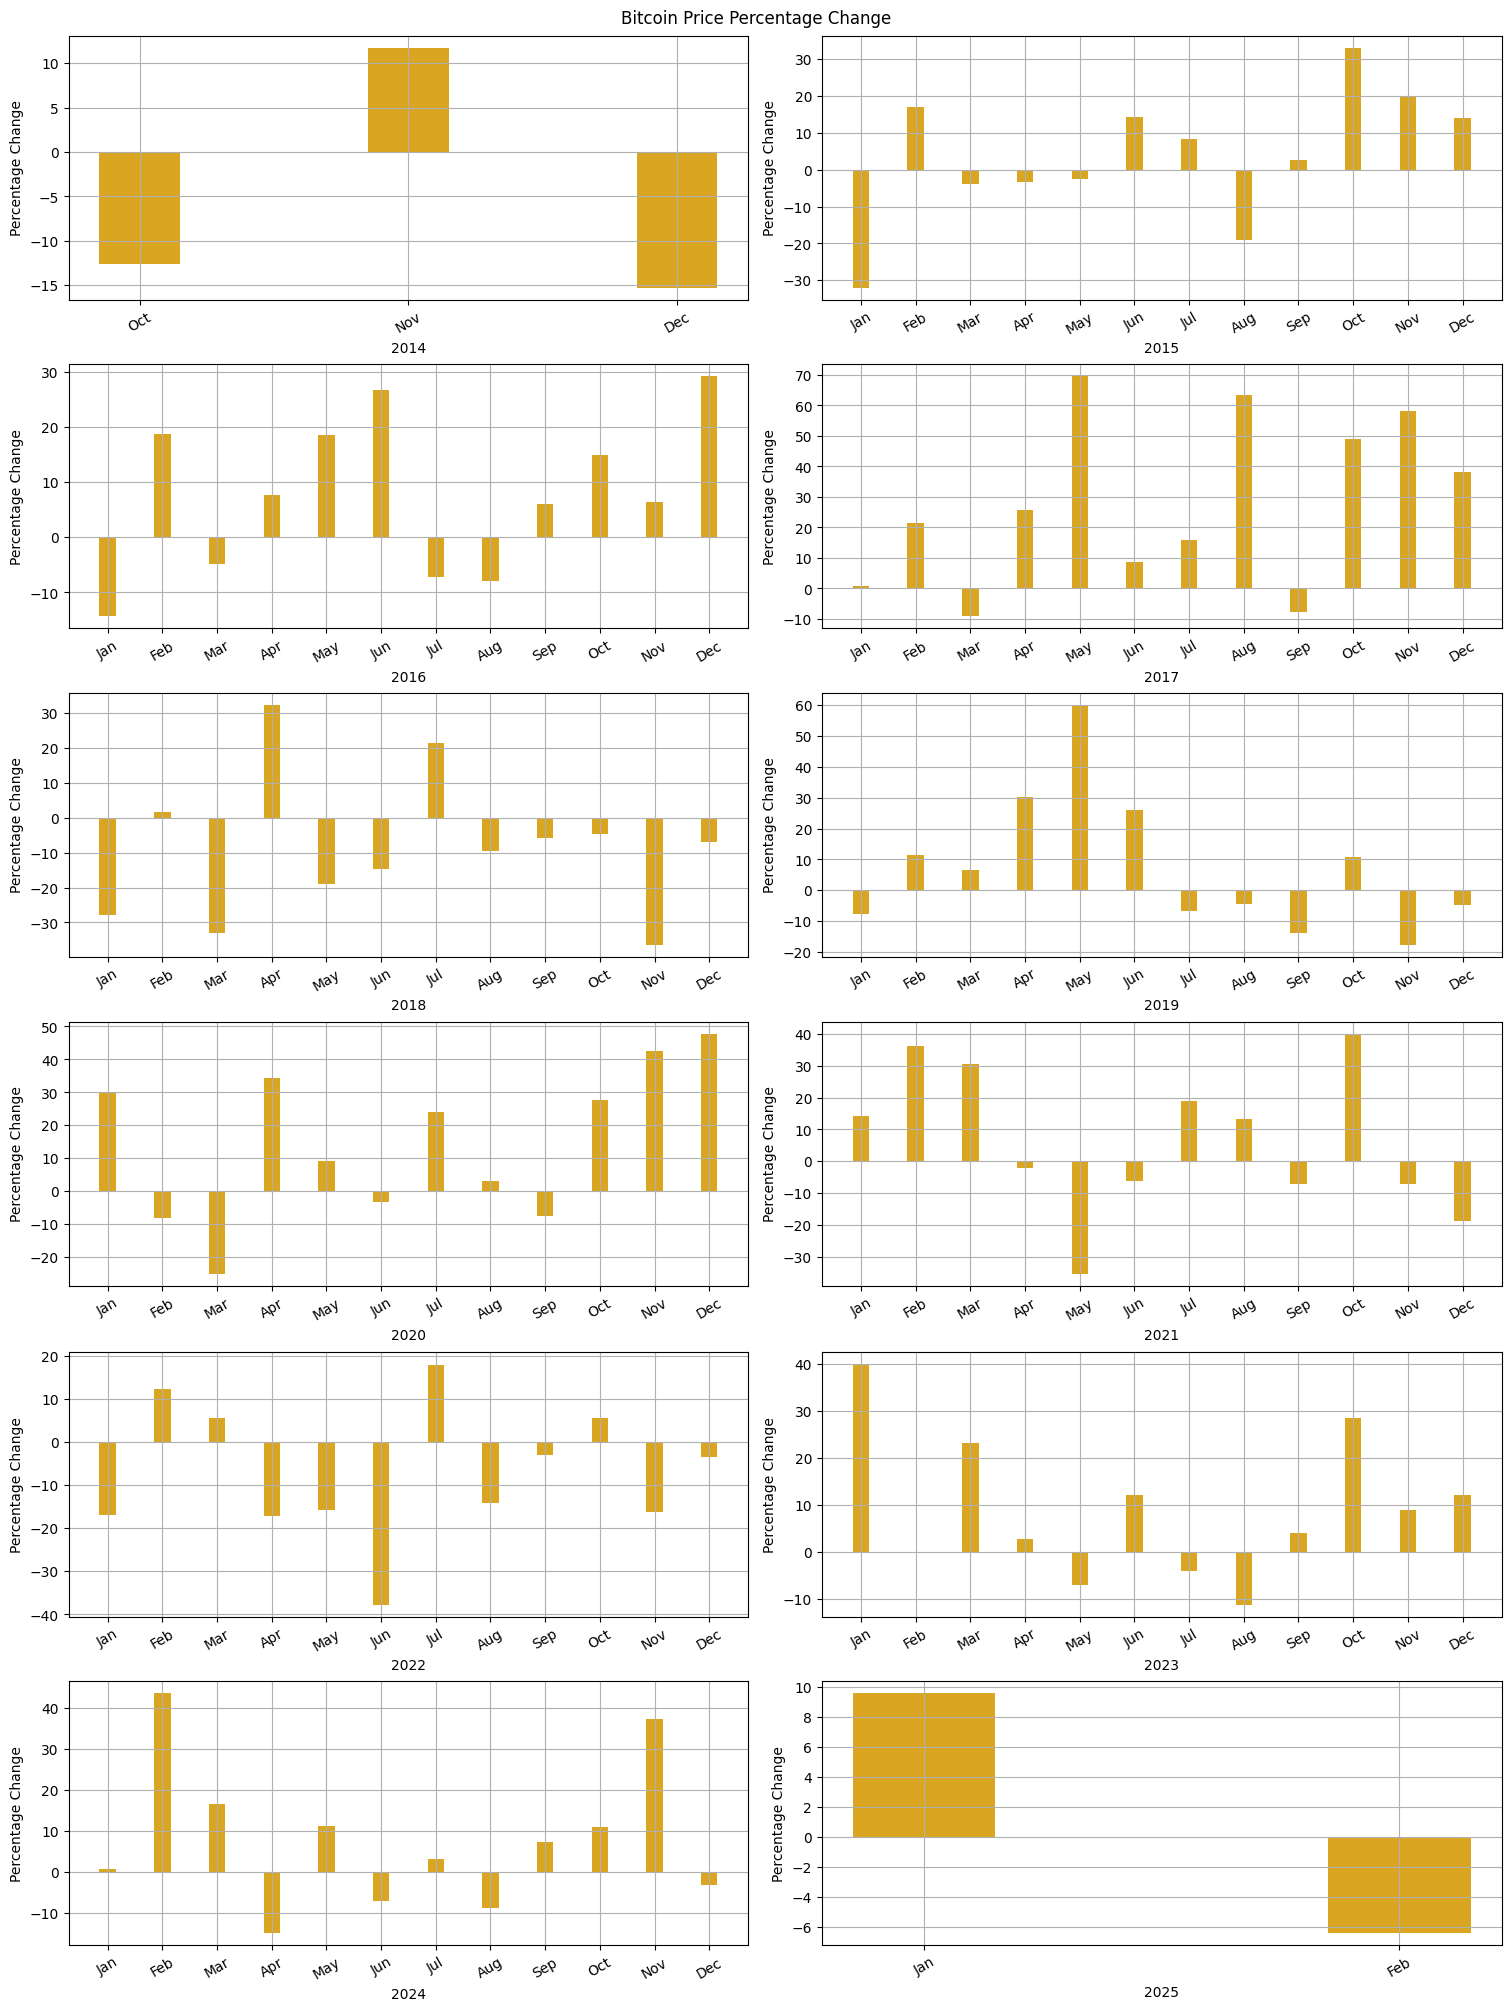

In [15]:
def graphics(dfr,freq):
    r = dfr.reset_index()
    f = r.to_numpy().transpose().tolist()
    año = f[0]
    if freq == 'M':
        period = ['Jan','Feb','Mar','Apr','May','Jun',
                  'Jul','Aug','Sep','Oct','Nov','Dec']
    elif freq == '6M':
        period = ['Semestre 1', 'Semestre 2']
    elif freq == '4M':
        period = ['Cuartil 1', 'Cuartil 2', 'Cuartil 3']
    elif freq == '3M':
        period = ['Q1', 'Q2', 'Q3', 'Q4']
    
    #Columns 
    n = len (dfr)
    k = 0
    fig, ax = plt.subplots(round(n/2),2, figsize=(15,20), constrained_layout=True)
    fig.suptitle('Bitcoin Price Percentage Change')
    for i in range(0, round(n/2)):
        for j in range(0,2):
            if k >= n:
                break
            else:
                ax[i,j].grid()
                ax[i,j].bar(period, dfr.iloc[k],color='goldenrod', width=0.3)
                ax[i,j].set(xlabel=int(año[k]), ylabel='Percentage Change')
                ax[i,j].tick_params(axis='x', rotation=30)
            k+=1

            
graphics(df_Rend, freq)